In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [3]:
train_df = pd.read_csv('../store-sales-time-series-forecasting/train.csv', parse_dates=['date'])
test_df = pd.read_csv('../store-sales-time-series-forecasting/test.csv', parse_dates=['date'])
oil_df = pd.read_csv('../store-sales-time-series-forecasting/oil.csv', parse_dates=['date'])
holidays_df = pd.read_csv('../store-sales-time-series-forecasting/holidays_events.csv', parse_dates=['date'])
transactions_df = pd.read_csv('../store-sales-time-series-forecasting/transactions.csv', parse_dates=['date'])
stores_df = pd.read_csv('../store-sales-time-series-forecasting/stores.csv')

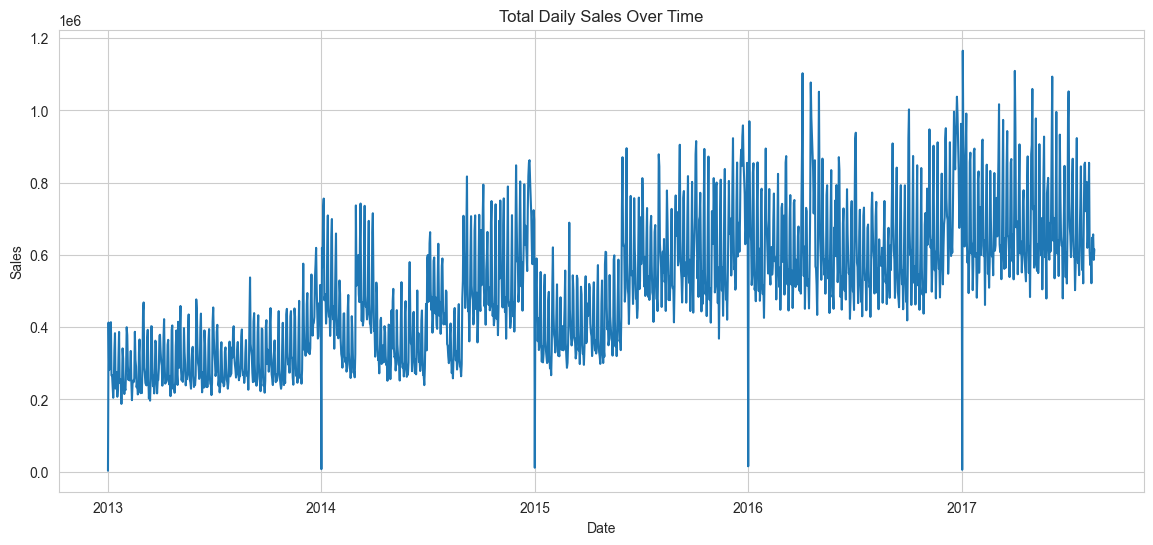

In [4]:
daily_sales = train_df.groupby('date')['sales'].sum()

# Build a sales schedule
plt.figure(figsize=(14,6))
plt.plot(daily_sales)
plt.title('Total Daily Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

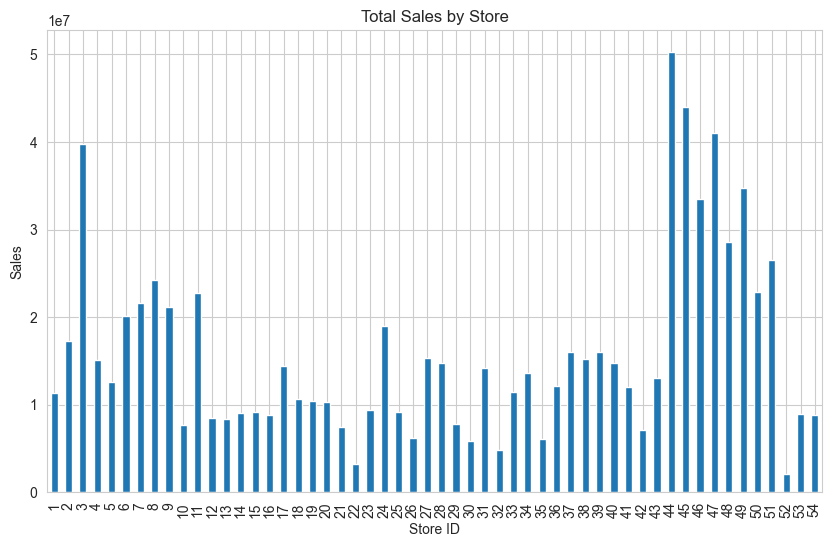

In [5]:
store_sales = train_df.groupby('store_nbr')['sales'].sum()

# Build a barplot to visualize sales by store
store_sales.plot(kind='bar', figsize=(10,6))
plt.title('Total Sales by Store')
plt.xlabel('Store ID')
plt.ylabel('Sales')
plt.show()


In [7]:
# Merge sales data with oil price data
merged_df = pd.merge(train_df, oil_df, on='date', how='left')

# View Oil Price Data
merged_df.head()

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico
0,2483653,2016-10-28,46,CLEANING,2576.000,61,48.72
1,2761877,2017-04-03,52,DAIRY,0.000,0,50.25
2,1217988,2014-11-16,33,MEATS,357.354,2,NaN
3,1231938,2014-11-24,25,HOME AND KITCHEN I,5.000,0,75.74
4,528175,2013-10-24,29,EGGS,0.000,0,96.65


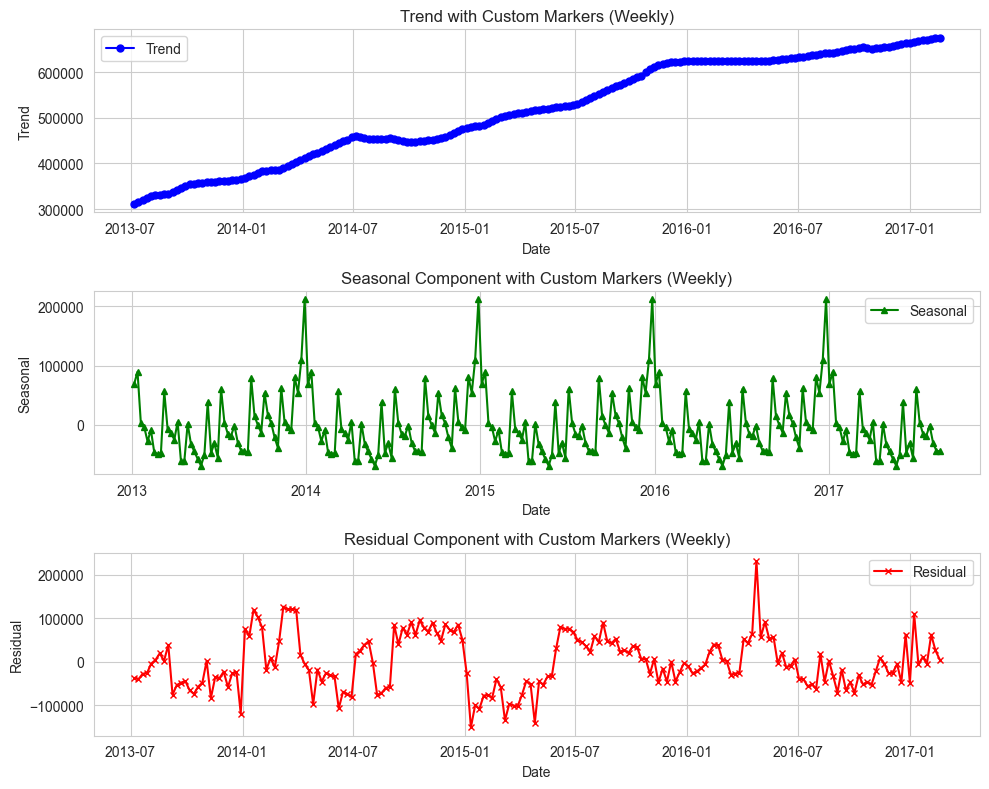

In [9]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Apply resampling to reduce data density
weekly_sales = daily_sales.resample('W').mean()

# Time series decomposition
decomposition = seasonal_decompose(weekly_sales, model='additive', period=52)  # Период для недель

# Extract decomposition components
trend = decomposition.trend
seasonal = decomposition.seasonal
resid = decomposition.resid

# Visualize components
plt.figure(figsize=(10,8))

# Trend
plt.subplot(3, 1, 1)
plt.plot(trend, marker='o', markersize=5, linestyle='-', color='b', label='Trend')
plt.title('Trend with Custom Markers (Weekly)')
plt.xlabel('Date')
plt.ylabel('Trend')
plt.legend()

# Seasonal
plt.subplot(3, 1, 2)
plt.plot(seasonal, marker='^', markersize=5, linestyle='-', color='g', label='Seasonal')
plt.title('Seasonal Component with Custom Markers (Weekly)')
plt.xlabel('Date')
plt.ylabel('Seasonal')
plt.legend()

# Residual
plt.subplot(3, 1, 3)
plt.plot(resid, marker='x', markersize=5, linestyle='-', color='r', label='Residual')
plt.title('Residual Component with Custom Markers (Weekly)')
plt.xlabel('Date')
plt.ylabel('Residual')
plt.legend()

plt.tight_layout()
plt.show()
